# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [36]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# mouse_metadata.dtypes
# study_results.dtypes

# Combine the data into a single DataFrame
merge_df= pd.merge(study_results,mouse_metadata,how="left" ,on=["Mouse ID"])

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count= merge_df["Mouse ID"].nunique()
print(f" Number of mice is :" , mice_count)


 Number of mice is : 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df

duplicate_value = merge_df.loc[merge_df.duplicated(subset= ["Mouse ID" ,"Timepoint"]),"Mouse ID"].unique()
duplicate_value


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. # check how to reset index later

# incomplete index does not match
duplicate_mouse_ID = merge_df.loc[merge_df["Mouse ID"] =="g989"]
duplicate_mouse_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# cleaned_df= merge_df.drop_duplicates(subset=["Mouse ID"])
# cleaned_df= cleaned_df.reset_index(drop=True)
# cleaned_df

cleaned_df = merge_df[merge_df["Mouse ID"] !="g989"]
cleaned_df

# #checking 
# duplicate_value = cleaned_df[cleaned_df.duplicated("Mouse ID")]
# duplicate_value

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [21]:
# Checking the number of mice in the clean DataFrame.

cleandata_count= cleaned_df["Mouse ID"].nunique()
print(f"The number of mice in the clean DataFrame is", cleandata_count)

The number of mice in the clean DataFrame is 248


## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
#each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean= merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median= merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance= merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std= merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem= merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

statistics_df= pd.DataFrame ({"mean":mean ,"median" : median,"var" :variance,
                            "std" :std,"sem" : sem })
statistics_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df = merge_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ['mean','median','var','std','sem']})
summary_stats_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

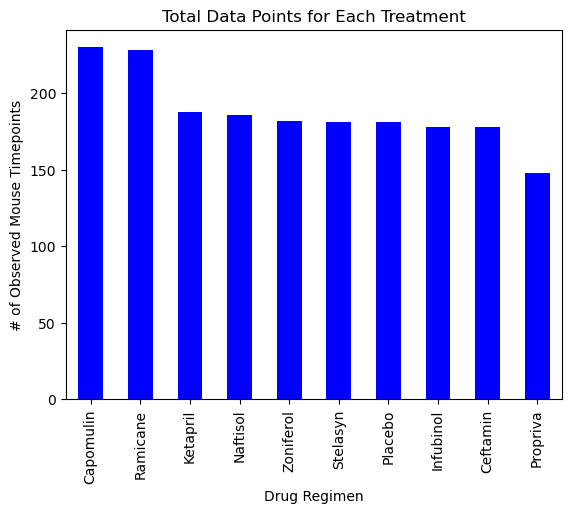

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
barchart= cleaned_df["Drug Regimen"].value_counts()
barchart.plot.bar(color="b")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Data Points for Each Treatment")
plt.xticks(rotation="vertical")
plt.show()


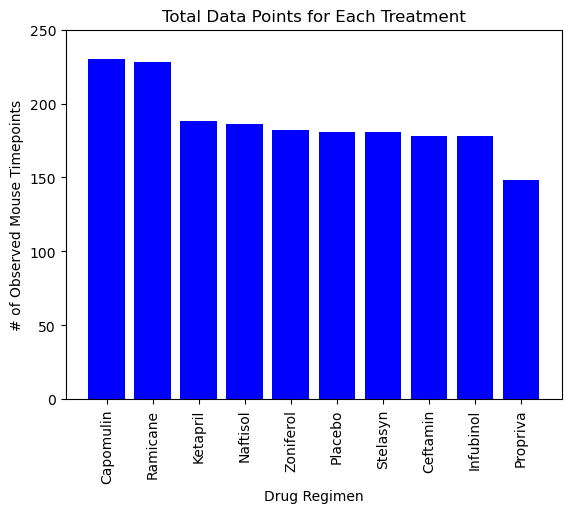

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

timepoint= cleaned_df.groupby(["Drug Regimen"])["Timepoint"].count()
timepoint= timepoint.sort_values(ascending=False)

plt.bar(timepoint.index,timepoint.values, color = "b", align= "center" )
plt.title("Total Data Points for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.yticks(range(0,300,50))
plt.show()

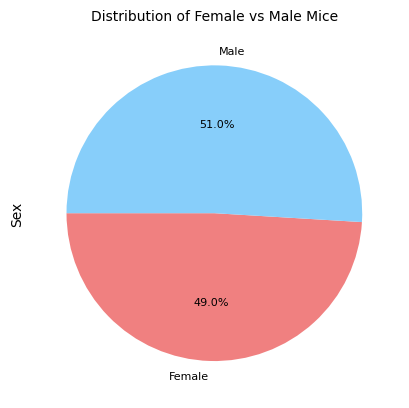

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = cleaned_df.groupby(["Sex"])["Sex"].count()

gender.plot(kind='pie', y= "Sex",autopct="%1.1f%%",colors= ["lightcoral" , "lightskyblue"], fontsize= 8 , startangle= 180)
plt.title('Distribution of Female vs Male Mice', fontsize= 10)
plt.show()

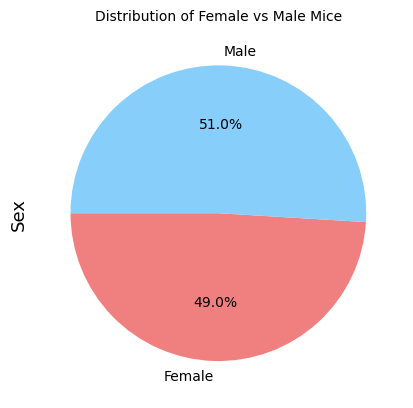

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = cleaned_df.groupby(["Sex"])["Sex"].count()
lables = gender.index
colors = ["lightcoral" , "lightskyblue"]
plt.pie(gender, colors=colors, labels= lables , autopct= "%1.1f%%", shadow=False, startangle=180)
plt.ylabel("Sex", loc="center", fontsize= 13 )
plt.title('Distribution of Female vs Male Mice', fontsize= 10)
plt.show()

## Quartiles, Outliers and Boxplots

In [157]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df= pd.DataFrame(cleaned_df.groupby(["Drug Regimen", "Mouse ID"])
                                    ["Timepoint"].max())
greatest_timepoint_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

greatest_timepoint_df=pd.merge(cleaned_df, greatest_timepoint_df , on= "Mouse ID")
greatest_timepoint_df.head()

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


In [175]:
# Put treatments into a list for for loop (and later for plot labels)

treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
t_volume=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for value in treatment:
    volume_df = greatest_timepoint_df.loc[greatest_timepoint_df['Drug Regimen'] == value]
    final_volume_df = volume_df.loc[volume_df['Timepoint_x'] == volume_df['Timepoint_y']]
    final_volume_df
    
    values = final_volume_df['Tumor Volume (mm3)']
    t_volume.append(values)
    # t_volume
    # # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles= values.quantile([0.25,0.5,0.75])
    iqr= quartiles[0.75] - quartiles[0.25]
    print(f'IQR for {value}: {iqr}')
    
    # # add subset 
    lower = quartiles[0.25] - (1.5*iqr)
    upper = quartiles[0.75] + (1.5*iqr)
    print(f'Lower Bound for {value}: {lower}')
    print(f'Upper Bound for {value}: {upper}')
    
    # # Determine outliers using upper and lower bounds
    # outliers = volume_df.loc[(volume_df> upper) | (volume_df < lower)]
   
    outliers = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower)]).count()
    print(f'Number of {value} outliers: {outliers}')
 
 

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


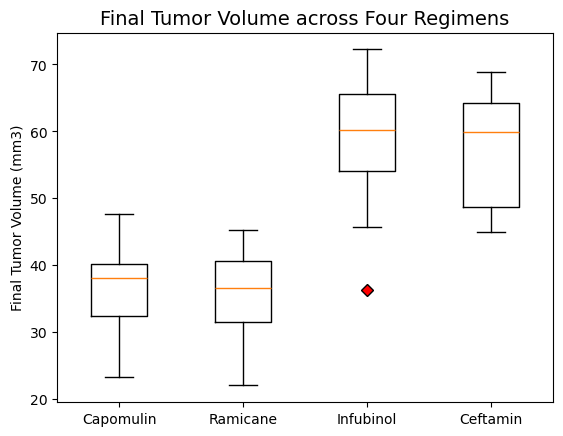

In [177]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_diamond = dict(markerfacecolor = "r", marker = "D")
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(t_volume, flierprops = red_diamond)
ax1.set_title("Final Tumor Volume across Four Regimens", fontsize = 14)
ax1.set_xticklabels(treatment)
plt.show()

## Line and Scatter Plots

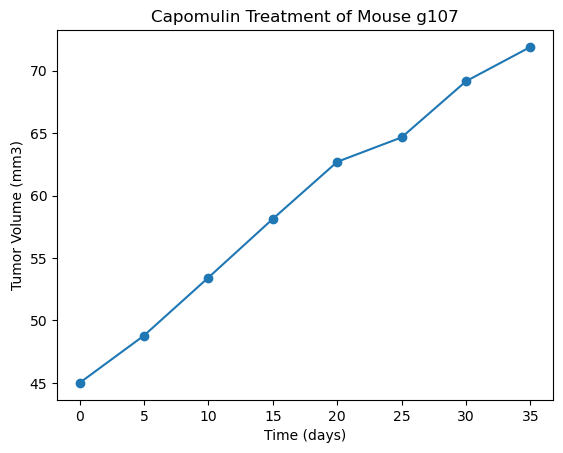

In [191]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse= merge_df.loc[merge_df["Mouse ID"] == "g107"]
mouse
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse g107")
plt.show()

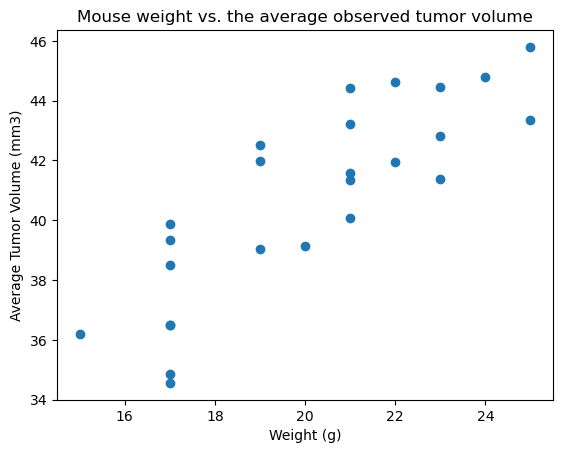

In [181]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = merge_df.loc[merge_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
avg_tumor_capomulin = capomulin_df["Tumor Volume (mm3)"].mean()
m_weight = capomulin_df["Weight (g)"].unique()
plt.scatter(m_weight, avg_tumor_capomulin)
plt.title("Mouse weight vs. the average observed tumor volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


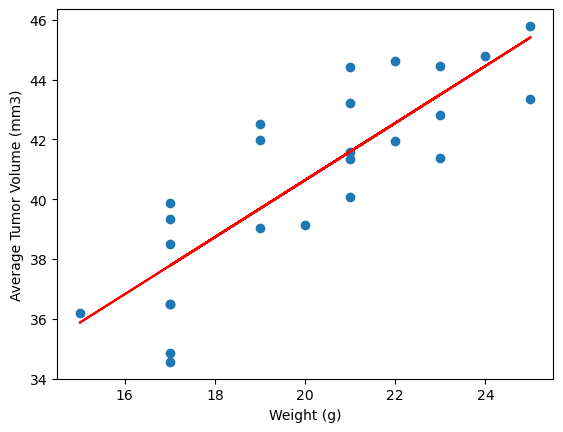

In [182]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
m_weight = m_weight.astype(float)
correlation = st.pearsonr(m_weight, avg_tumor_capomulin)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(m_weight, avg_tumor_capomulin)
regress_values = m_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(m_weight, avg_tumor_capomulin)
plt.plot(m_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()